In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [3]:
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

input\data_description.txt
input\sample_submit.csv
input\test.csv
input\train.csv


In [33]:
from pathlib import Path

input = Path('input')
df = pd.read_csv(input / 'train.csv')
df

,index,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,2827,911587246,18,RL,68,9241,Pave,Grvl,IR2,...,0,Gd,MnPrv,Shed,0,2,2005,WD,Normal,94946
1,3,1239,505139030,22,RL,50,6249,Pave,Grvl,Reg,...,0,Gd,MnPrv,Shed,0,5,2009,WD,Partial,162272
2,7,2768,524499845,64,RL,55,8757,Pave,Grvl,Reg,...,0,Gd,MnPrv,Shed,0,7,2009,WD,Normal,129620
3,10,2120,890941778,60,RL,43,12946,Grvl,Grvl,Reg,...,0,Gd,MnPrv,Shed,0,6,2007,WD,Normal,124625
4,11,407,902420295,64,RM,137,5902,Pave,Grvl,Reg,...,2,Gd,MnPrv,Shed,0,5,2007,WD,Normal,145879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1988,2096,893611247,26,RH,66,9733,Pave,Grvl,Reg,...,1,Gd,MnPrv,Shed,0,2,2010,WD,Abnorml,196202
1196,1994,3162,898398963,45,RL,66,11775,Pave,Grvl,Reg,...,0,Gd,MnPrv,Shed,0,4,2007,WD,Normal,127039
1197,1996,2644,913838268,67,RL,25,5566,Pave,Grvl,IR1,...,2,Gd,MnPrv,Shed,0,5,2006,WD,Normal,156413
1198,1997,2111,873757310,90,RL,66,10512,Pave,Grvl,Reg,...,0,Gd,MnPrv,Shed,0,5,2010,WD,Normal,66763


In [34]:
test = pd.read_csv(input / 'test.csv')
test

,index,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,1,678,902488893,101,RM,79,13279,Pave,Grvl,IR1,...,0,3,Gd,MnPrv,Shed,0,6,2005,WD,Normal
1,2,2920,525564703,62,RL,65,14083,Pave,Grvl,Reg,...,0,1,Gd,MnPrv,Shed,0,4,2006,ConLI,Normal
2,4,2663,914091683,81,RL,66,7589,Pave,Grvl,Reg,...,138,0,Gd,MnPrv,Shed,0,7,2006,WD,Abnorml
3,5,2268,907650321,78,RL,105,11548,Pave,Grvl,IR1,...,0,3,Gd,MnPrv,Shed,0,8,2006,WD,Normal
4,6,2522,512558747,27,RL,59,14676,Pave,Grvl,IR1,...,100,0,Gd,MnPrv,Shed,0,4,2006,WD,Abnorml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1991,3020,934529286,51,RL,69,12521,Pave,Grvl,Reg,...,0,2,Gd,MnPrv,Shed,0,3,2007,WD,Normal
796,1992,2625,871013896,26,RM,64,12739,Pave,Grvl,IR1,...,0,1,Gd,MnPrv,Shed,0,8,2006,WD,Normal
797,1993,1904,892402991,53,RL,86,0,Pave,Grvl,Reg,...,0,0,Gd,MnPrv,Shed,0,2,2005,COD,Partial
798,1995,2828,877497192,87,RM,81,10412,Pave,Grvl,Reg,...,1,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            1200 non-null   int64 
 1   Order            1200 non-null   int64 
 2   PID              1200 non-null   int64 
 3   MS SubClass      1200 non-null   int64 
 4   MS Zoning        1200 non-null   object
 5   Lot Frontage     1200 non-null   int64 
 6   Lot Area         1200 non-null   int64 
 7   Street           1200 non-null   object
 8   Alley            1200 non-null   object
 9   Lot Shape        1200 non-null   object
 10  Land Contour     1200 non-null   object
 11  Utilities        1200 non-null   object
 12  Lot Config       1200 non-null   object
 13  Land Slope       1200 non-null   object
 14  Neighborhood     1200 non-null   object
 15  Condition 1      1200 non-null   object
 16  Condition 2      1200 non-null   object
 17  Bldg Type        1200 non-null   

In [21]:
df.columns

Index(['index', 'Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage',
       'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',

In [22]:
for col in df.columns:
    print(str(col) + ':' + str(len(df[col].unique())))

index:1200
Order:964
PID:1200
MS SubClass:172
MS Zoning:6
Lot Frontage:117
Lot Area:1144
Street:2
Alley:2
Lot Shape:4
Land Contour:4
Utilities:2
Lot Config:5
Land Slope:3
Neighborhood:28
Condition 1:9
Condition 2:8
Bldg Type:5
House Style:8
Overall Qual:11
Overall Cond:10
Year Built:132
Year Remod/Add:69
Roof Style:6
Roof Matl:5
Exterior 1st:13
Exterior 2nd:15
Mas Vnr Type:4
Mas Vnr Area:240
Exter Qual:4
Exter Cond:5
Foundation:6
Bsmt Qual:5
Bsmt Cond:5
Bsmt Exposure:4
BsmtFin Type 1:6
BsmtFin SF 1:713
BsmtFin Type 2:6
Bsmt Unf SF:638
Total Bsmt SF:826
Heating:6
Heating QC:5
Central Air:2
Electrical:4
1st Flr SF:770
2nd Flr SF:523
Low Qual Fin SF:9
Gr Liv Area:861
Bsmt Full Bath:3
Full Bath:4
Half Bath:4
Bedroom AbvGr:8
Kitchen AbvGr:3
Kitchen Qual:4
TotRms AbvGrd:13
Functional:8
Fireplaces:5
Fireplace Qu:5
Garage Type:6
Garage Yr Blt:90
Garage Finish:3
Garage Cars:6
Garage Area:552
Garage Qual:5
Garage Cond:5
Paved Drive:3
Wood Deck SF:236
Open Porch SF:140
Enclosed Porch:108
3Ssn Por

In [37]:
numerical_feats = df.dtypes[df.dtypes != 'object'].index
print('Number of Numerical features : ',len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == 'object'].index
print('Number of Categorical features : ',len(categorical_feats))

Number of Numerical features :  38
Number of Categorical features :  43


In [10]:
print(df[numerical_feats].columns)
print('*'*80)
print(df[categorical_feats].columns)

Index(['index', 'Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')
********************************************************************************
Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',

In [26]:
print(df.isnull().sum().sum())

0


In [35]:
df['SalePrice'] = df['SalePrice'] + 1
df['SalePrice_Log'] = np.log(df['SalePrice'])

C:\Users\81806\anaconda3\envs\kaggle_book\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness : -7.068831
Kurtosis : 69.228688


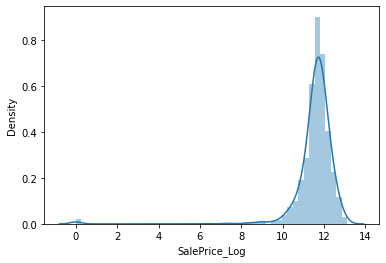

In [36]:
import seaborn as sns

sns.distplot(df['SalePrice_Log'])

print('Skewness : %f' %df['SalePrice_Log'].skew())
print('Kurtosis : %f' %df['SalePrice_Log'].kurt())

df.drop('SalePrice',axis=1,inplace=True)

In [40]:
target = 'SalePrice_Log'
min_val_corr = 0.045

corr = df.corr()
corr_abs = corr.abs()

nr_num_cols = len(numerical_feats)
ser_corr = corr_abs.nlargest(nr_num_cols,target)[target]

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)

print(ser_corr)
print('&'*40)
print('List of numerical features with r above min_val_corr : ')
print(cols_abv_corr_limit)
print('$'*40)
print('List of numerical features with r below min_val_corr : ')
print(cols_bel_corr_limit)

SalePrice_Log      1.000000
Full Bath          0.074900
Kitchen AbvGr      0.058671
Total Bsmt SF      0.048301
Mo Sold            0.047910
BsmtFin SF 1       0.047058
Order              0.046104
Yr Sold            0.045166
Open Porch SF      0.044274
Lot Frontage       0.044081
Gr Liv Area        0.044020
Mas Vnr Area       0.040244
Lot Area           0.038556
Overall Qual       0.038145
Garage Cars        0.033096
TotRms AbvGrd      0.030330
Garage Area        0.030203
Screen Porch       0.029995
PID                0.029084
Bsmt Full Bath     0.026192
Year Built         0.024886
index              0.024831
3Ssn Porch         0.024375
2nd Flr SF         0.023222
Wood Deck SF       0.022981
Enclosed Porch     0.021375
MS SubClass        0.020625
Year Remod/Add     0.019644
Bedroom AbvGr      0.015007
Fireplaces         0.013947
Half Bath          0.013392
Garage Yr Blt      0.013360
Bsmt Unf SF        0.012930
Misc Val           0.010364
Low Qual Fin SF    0.009816
1st Flr SF         0

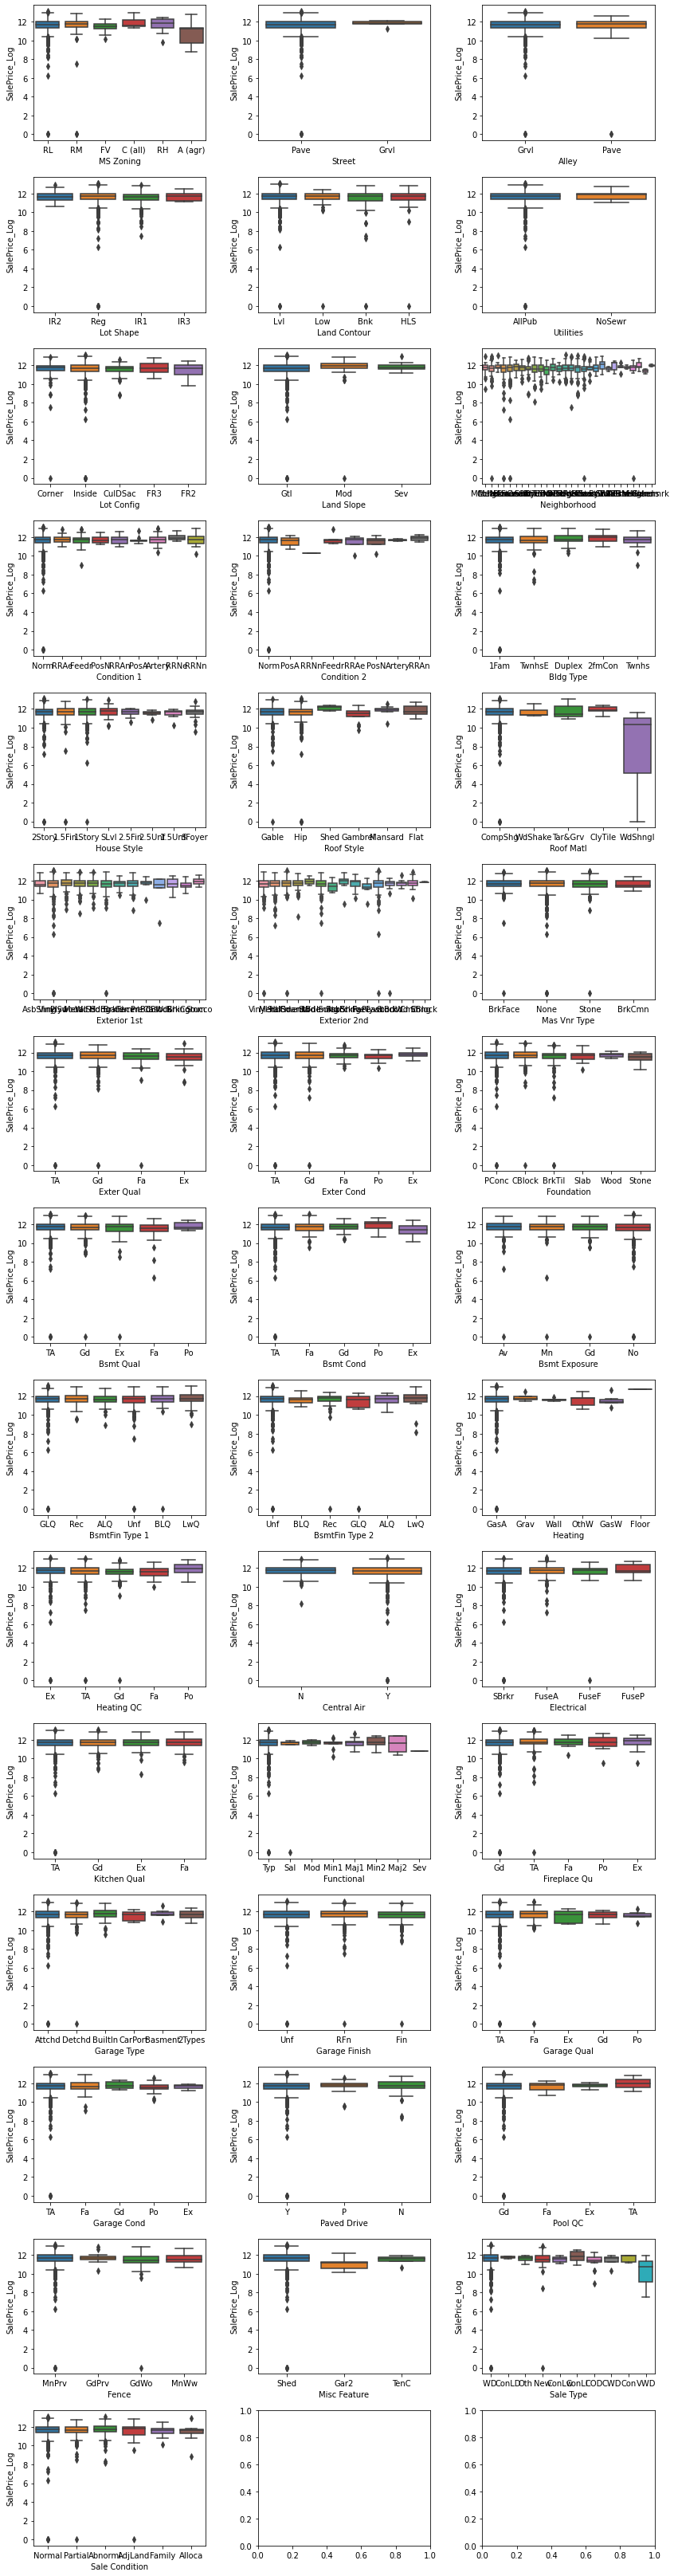

In [42]:
li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig,axs = plt.subplots(nr_rows,nr_cols,figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i],y=target,data=df,ax=axs[r][c])
            
plt.tight_layout()
plt.show()

In [43]:
catg_strong_corr = ['MS Zoning','Condition 2','Roof Style','Roof Matl','Bsmt Cond'
                   ,'Heating','Heating QC','Misc Feature','Sale Type']

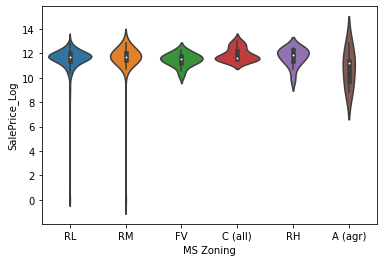

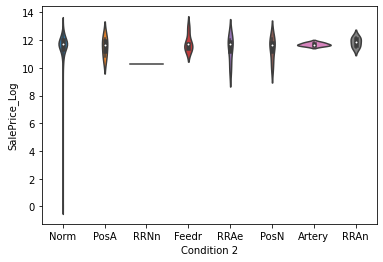

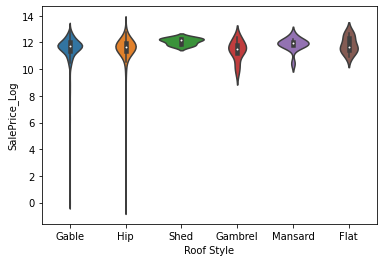

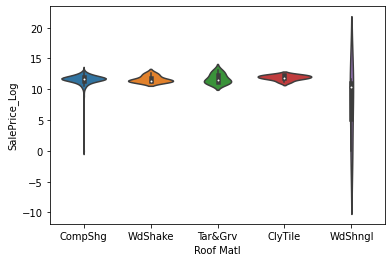

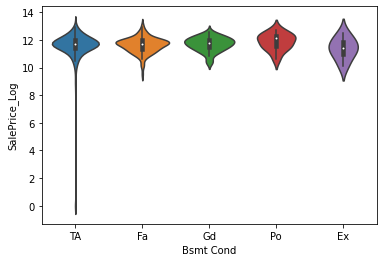

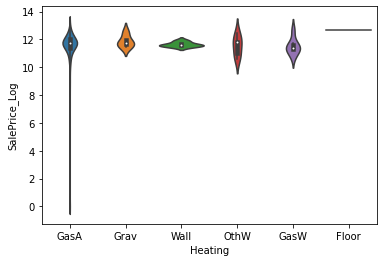

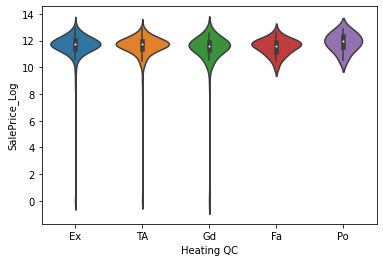

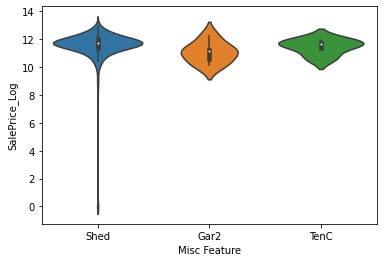

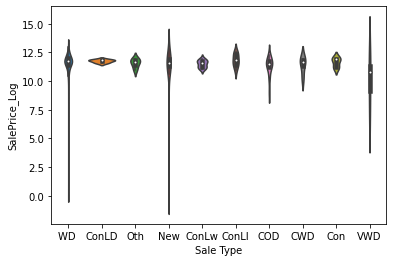

In [45]:
catg_list = catg_strong_corr.copy()
#catg_list.remove('Neighborhood')  #変数の多いものは取り除くべき？
#catg_list.remove('Exterior 2nd')

for catg in catg_list:
    #sns.catplot(x=catg,y=target,data=df_train,kind='boxen')
    sns.violinplot(x=catg,y=target,data=df)
    plt.show()
    #sns.boxenplot(x=catg,y=target,data=df_train)
    #bp = df_train.boxplot(column=[target],by=catg)

In [46]:
for catg in catg_list:
    g = df.groupby(catg)[target].mean()
    print(g)

MS Zoning
A (agr)    10.800504
C (all)    11.921246
FV         11.481500
RH         11.702930
RL         11.573068
RM         11.544617
Name: SalePrice_Log, dtype: float64
Condition 2
Artery    11.703080
Feedr     11.795027
Norm      11.569468
PosA      11.518583
PosN      11.405078
RRAe      11.401447
RRAn      11.853964
RRNn      10.309752
Name: SalePrice_Log, dtype: float64
Roof Style
Flat       11.844693
Gable      11.630064
Gambrel    11.408969
Hip        11.466115
Mansard    11.864685
Shed       12.090016
Name: SalePrice_Log, dtype: float64
Roof Matl
ClyTile    11.933878
CompShg    11.576312
Tar&Grv    11.749760
WdShake    11.671068
WdShngl     7.326983
Name: SalePrice_Log, dtype: float64
Bsmt Cond
Ex    11.381351
Fa    11.630527
Gd    11.692691
Po    11.864404
TA    11.554052
Name: SalePrice_Log, dtype: float64
Heating
Floor    12.704904
GasA     11.567699
GasW     11.509132
Grav     11.869439
OthW     11.529686
Wall     11.643488
Name: SalePrice_Log, dtype: float64
Heating QC
E

In [47]:
#one-hot encoding
dfall = pd.concat([df,test],axis=0)
dfall_catg = dfall[catg_strong_corr]
dummy_dfall = pd.get_dummies(dfall_catg)
print(dummy_dfall)

     MS Zoning_A (agr)  MS Zoning_C (all)  MS Zoning_FV  MS Zoning_RH  \
0                    0                  0             0             0   
1                    0                  0             0             0   
2                    0                  0             0             0   
3                    0                  0             0             0   
4                    0                  0             0             0   
..                 ...                ...           ...           ...   
795                  0                  0             0             0   
796                  0                  0             0             0   
797                  0                  0             0             0   
798                  0                  0             0             0   
799                  0                  0             0             0   

     MS Zoning_RL  MS Zoning_RM  Condition 2_Artery  Condition 2_Feedr  \
0               1             0                  

In [48]:
dfall_num = dfall[cols_abv_corr_limit]
print(dfall_num.columns)

Index(['SalePrice_Log', 'Full Bath', 'Kitchen AbvGr', 'Total Bsmt SF',
       'Mo Sold', 'BsmtFin SF 1', 'Order', 'Yr Sold'],
      dtype='object')


In [49]:
data = pd.concat([dfall_num,dummy_dfall],axis=1)
data

,SalePrice_Log,Full Bath,Kitchen AbvGr,Total Bsmt SF,Mo Sold,BsmtFin SF 1,Order,Yr Sold,MS Zoning_A (agr),MS Zoning_C (all),...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,11.461074,2,1,1343,2,30,2827,2005,0,0,...,0,0,0,0,0,0,0,0,0,1
1,11.997035,2,2,1202,5,528,1239,2009,0,0,...,0,0,0,0,0,0,0,0,0,1
2,11.772370,1,0,825,7,1866,2768,2009,0,0,...,0,0,0,0,0,0,0,0,0,1
3,11.733073,1,1,787,6,65,2120,2007,0,0,...,0,0,0,0,0,0,0,0,0,1
4,11.890540,0,1,713,5,0,407,2007,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,NaN,1,1,2011,3,429,3020,2007,0,0,...,0,0,0,0,0,0,0,0,0,1
796,NaN,1,1,700,8,406,2625,2006,0,0,...,0,0,0,0,0,0,0,0,0,1
797,NaN,1,1,767,2,495,1904,2005,0,0,...,1,0,0,0,0,0,0,0,0,0
798,NaN,0,1,2388,5,82,2828,2007,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
train = data.iloc[:len(df),:]
test = data.iloc[len(df):,:]

In [51]:
train

,SalePrice_Log,Full Bath,Kitchen AbvGr,Total Bsmt SF,Mo Sold,BsmtFin SF 1,Order,Yr Sold,MS Zoning_A (agr),MS Zoning_C (all),...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,11.461074,2,1,1343,2,30,2827,2005,0,0,...,0,0,0,0,0,0,0,0,0,1
1,11.997035,2,2,1202,5,528,1239,2009,0,0,...,0,0,0,0,0,0,0,0,0,1
2,11.772370,1,0,825,7,1866,2768,2009,0,0,...,0,0,0,0,0,0,0,0,0,1
3,11.733073,1,1,787,6,65,2120,2007,0,0,...,0,0,0,0,0,0,0,0,0,1
4,11.890540,0,1,713,5,0,407,2007,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,12.186905,1,1,1116,2,107,2096,2010,0,0,...,0,0,0,0,0,0,0,0,0,1
1196,11.752257,2,1,444,4,867,3162,2007,0,0,...,0,0,0,0,0,0,0,0,0,1
1197,11.960262,1,1,999,5,430,2644,2006,0,0,...,0,0,0,0,0,0,0,0,0,1
1198,11.108919,1,1,1239,5,1051,2111,2010,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
test

,SalePrice_Log,Full Bath,Kitchen AbvGr,Total Bsmt SF,Mo Sold,BsmtFin SF 1,Order,Yr Sold,MS Zoning_A (agr),MS Zoning_C (all),...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,NaN,1,1,508,6,317,678,2005,0,0,...,0,0,0,0,0,0,0,0,0,1
1,NaN,1,1,692,4,277,2920,2006,0,0,...,0,0,0,0,1,0,0,0,0,0
2,NaN,2,1,1015,7,0,2663,2006,0,0,...,0,0,0,0,0,0,0,0,0,1
3,NaN,2,1,1040,8,46,2268,2006,0,0,...,0,0,0,0,0,0,0,0,0,1
4,NaN,1,0,719,4,729,2522,2006,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,NaN,1,1,2011,3,429,3020,2007,0,0,...,0,0,0,0,0,0,0,0,0,1
796,NaN,1,1,700,8,406,2625,2006,0,0,...,0,0,0,0,0,0,0,0,0,1
797,NaN,1,1,767,2,495,1904,2005,0,0,...,1,0,0,0,0,0,0,0,0,0
798,NaN,0,1,2388,5,82,2828,2007,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [56]:
folds = train.copy()
Fold = KFold(n_splits=5,shuffle=True,random_state=42)
for n, (train_index, val_index) in enumerate(Fold.split(folds,folds['SalePrice_Log'])):
    folds.loc[val_index,'fold'] = int(n)
folds['fold'] = folds['fold'].astype(int)
print(folds.groupby(['fold','SalePrice_Log']).size())

fold  SalePrice_Log
0     0.000000         2
      7.232733         1
      7.493317         1
      8.325548         1
      8.827615         1
                      ..
4     12.606967        1
      12.628385        1
      12.710514        1
      12.738464        1
      12.786759        1
Length: 1195, dtype: int64


In [57]:
p_train = folds[folds['fold'] != 0]
p_val = folds[folds['fold'] == 0]

p_train

,SalePrice_Log,Full Bath,Kitchen AbvGr,Total Bsmt SF,Mo Sold,BsmtFin SF 1,Order,Yr Sold,MS Zoning_A (agr),MS Zoning_C (all),...,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,fold
0,11.461074,2,1,1343,2,30,2827,2005,0,0,...,0,0,0,0,0,0,0,0,1,2
1,11.997035,2,2,1202,5,528,1239,2009,0,0,...,0,0,0,0,0,0,0,0,1,4
2,11.772370,1,0,825,7,1866,2768,2009,0,0,...,0,0,0,0,0,0,0,0,1,1
3,11.733073,1,1,787,6,65,2120,2007,0,0,...,0,0,0,0,0,0,0,0,1,1
4,11.890540,0,1,713,5,0,407,2007,0,0,...,0,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,12.186905,1,1,1116,2,107,2096,2010,0,0,...,0,0,0,0,0,0,0,0,1,2
1196,11.752257,2,1,444,4,867,3162,2007,0,0,...,0,0,0,0,0,0,0,0,1,4
1197,11.960262,1,1,999,5,430,2644,2006,0,0,...,0,0,0,0,0,0,0,0,1,3
1198,11.108919,1,1,1239,5,1051,2111,2010,0,0,...,0,0,0,0,0,0,0,0,1,3


In [58]:
#indexを振りなおす
p_train = p_train.reset_index(drop=True)
p_val = p_val.reset_index(drop=True)

In [59]:
p_train

,SalePrice_Log,Full Bath,Kitchen AbvGr,Total Bsmt SF,Mo Sold,BsmtFin SF 1,Order,Yr Sold,MS Zoning_A (agr),MS Zoning_C (all),...,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,fold
0,11.461074,2,1,1343,2,30,2827,2005,0,0,...,0,0,0,0,0,0,0,0,1,2
1,11.997035,2,2,1202,5,528,1239,2009,0,0,...,0,0,0,0,0,0,0,0,1,4
2,11.772370,1,0,825,7,1866,2768,2009,0,0,...,0,0,0,0,0,0,0,0,1,1
3,11.733073,1,1,787,6,65,2120,2007,0,0,...,0,0,0,0,0,0,0,0,1,1
4,11.890540,0,1,713,5,0,407,2007,0,0,...,0,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,12.186905,1,1,1116,2,107,2096,2010,0,0,...,0,0,0,0,0,0,0,0,1,2
956,11.752257,2,1,444,4,867,3162,2007,0,0,...,0,0,0,0,0,0,0,0,1,4
957,11.960262,1,1,999,5,430,2644,2006,0,0,...,0,0,0,0,0,0,0,0,1,3
958,11.108919,1,1,1239,5,1051,2111,2010,0,0,...,0,0,0,0,0,0,0,0,1,3


In [61]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import random

In [62]:
seed_value = 123

In [63]:
def seed_torch(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    
seed_torch(seed=seed_value)

In [64]:
cols = list(p_train)
feats = cols.copy()
feats.remove('SalePrice_Log')
print(feats)

['Full Bath', 'Kitchen AbvGr', 'Total Bsmt SF', 'Mo Sold', 'BsmtFin SF 1', 'Order', 'Yr Sold', 'MS Zoning_A (agr)', 'MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Condition 2_Artery', 'Condition 2_Feedr', 'Condition 2_Norm', 'Condition 2_PosA', 'Condition 2_PosN', 'Condition 2_RRAe', 'Condition 2_RRAn', 'Condition 2_RRNn', 'Roof Style_Flat', 'Roof Style_Gable', 'Roof Style_Gambrel', 'Roof Style_Hip', 'Roof Style_Mansard', 'Roof Style_Shed', 'Roof Matl_ClyTile', 'Roof Matl_CompShg', 'Roof Matl_Tar&Grv', 'Roof Matl_WdShake', 'Roof Matl_WdShngl', 'Bsmt Cond_Ex', 'Bsmt Cond_Fa', 'Bsmt Cond_Gd', 'Bsmt Cond_Po', 'Bsmt Cond_TA', 'Heating_Floor', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'Heating QC_Ex', 'Heating QC_Fa', 'Heating QC_Gd', 'Heating QC_Po', 'Heating QC_TA', 'Misc Feature_Gar2', 'Misc Feature_Shed', 'Misc Feature_TenC', 'Sale Type_COD', 'Sale Type_CWD', 'Sale Type_Con', 'Sale Type_ConLD', 'Sale Type_ConLI

In [65]:
train_X = np.array(p_train[feats])
train_Y = np.array(p_train[target])
val_X = np.array(p_val[feats])
val_Y = np.array(p_val[target])

In [66]:
train_X.shape

(960, 62)

In [67]:
train_Y.shape

(960,)

In [68]:
train_X[:3]

array([[   2,    1, 1343,    2,   30, 2827, 2005,    0,    0,    0,    0,
           1,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
           1,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,
           0,    0,    0,    1,    0,    1,    0,    0,    0,    0,    1,
           0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    1,    2],
       [   2,    2, 1202,    5,  528, 1239, 2009,    0,    0,    0,    0,
           1,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
           1,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,
           0,    0,    0,    1,    0,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    1,    0,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    1,    4],
       [   1,    0,  825,    7, 1866, 2768, 2009,    0,    0,    0,    0,
           1,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
          

In [69]:
#正規化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

In [70]:
#torch.tensor型では勾配情報をトレースする

train_X = torch.from_numpy(train_X).float()
train_Y = torch.from_numpy(train_Y).float()

val_X = torch.from_numpy(val_X).float()
val_Y = torch.from_numpy(val_Y).float()   #long : int64

In [71]:
#バッチ処理するフォーマットに変える
train_dataset = TensorDataset(train_X,train_Y)
val_dataset = TensorDataset(val_X,val_Y)

In [72]:
print(train_X[:3])
print(train_Y[:3])

tensor([[ 1.4357, -0.0961,  0.4909, -1.1662, -1.1027,  1.0999, -1.5364, -0.0560,
         -0.1125, -0.1172, -0.1026,  0.4738, -0.4097, -0.0560, -0.0724,  0.1567,
         -0.0457, -0.0647, -0.0647, -0.0647, -0.0323, -0.0793,  0.8782, -0.1125,
         -0.8200, -0.1026, -0.0647, -0.0857,  0.1567, -0.0917, -0.0793, -0.0457,
         -0.0724, -0.3314, -0.2165, -0.1077,  0.4371,  0.0000,  0.1302, -0.0857,
         -0.0647, -0.0560, -0.0457,  1.0084, -0.1459, -0.3157, -0.1026, -0.7867,
         -0.0647,  0.0857, -0.0560, -0.1125, -0.0560, -0.0724, -0.0457, -0.0917,
         -0.1026, -0.2319, -0.0647, -0.0457,  0.3314, -0.4472],
        [ 1.4357,  2.2704,  0.1812,  0.0627, -0.2905, -0.6589,  1.3742, -0.0560,
         -0.1125, -0.1172, -0.1026,  0.4738, -0.4097, -0.0560, -0.0724,  0.1567,
         -0.0457, -0.0647, -0.0647, -0.0647, -0.0323, -0.0793,  0.8782, -0.1125,
         -0.8200, -0.1026, -0.0647, -0.0857,  0.1567, -0.0917, -0.0793, -0.0457,
         -0.0724, -0.3314, -0.2165, -0.1077, 

In [73]:
train_dataset[0]

(tensor([ 1.4357, -0.0961,  0.4909, -1.1662, -1.1027,  1.0999, -1.5364, -0.0560,
         -0.1125, -0.1172, -0.1026,  0.4738, -0.4097, -0.0560, -0.0724,  0.1567,
         -0.0457, -0.0647, -0.0647, -0.0647, -0.0323, -0.0793,  0.8782, -0.1125,
         -0.8200, -0.1026, -0.0647, -0.0857,  0.1567, -0.0917, -0.0793, -0.0457,
         -0.0724, -0.3314, -0.2165, -0.1077,  0.4371,  0.0000,  0.1302, -0.0857,
         -0.0647, -0.0560, -0.0457,  1.0084, -0.1459, -0.3157, -0.1026, -0.7867,
         -0.0647,  0.0857, -0.0560, -0.1125, -0.0560, -0.0724, -0.0457, -0.0917,
         -0.1026, -0.2319, -0.0647, -0.0457,  0.3314, -0.4472]),
 tensor(11))

In [74]:
train_dataloader = DataLoader(train_dataset,batch_size=128,shuffle=True)
val_dataloader = DataLoader(val_dataset,batch_size=32,shuffle=False)

In [75]:
for a in train_dataloader:
    print(a)
    break

[tensor([[-0.1025, -0.0961,  1.0862,  ..., -0.0457,  0.3314, -1.3416],
        [-0.1025, -0.0961,  2.3230,  ..., -0.0457, -3.0175,  0.4472],
        [ 1.4357,  2.2704,  0.1658,  ..., -0.0457,  0.3314, -0.4472],
        ...,
        [-0.1025, -0.0961, -0.9326,  ..., -0.0457,  0.3314, -1.3416],
        [-0.1025, -0.0961, -0.3812,  ..., -0.0457,  0.3314,  1.3416],
        [ 1.4357, -0.0961, -0.9282,  ..., -0.0457,  0.3314, -1.3416]]), tensor([11, 10, 12, 11, 12, 12, 11, 10, 12, 11, 11, 12, 12, 12, 11, 11, 11, 11,
         9, 11, 13, 10, 11, 12, 12, 12, 11, 12, 12, 11, 11, 11, 12, 12, 12, 11,
        11, 10, 11, 11, 10, 11, 12, 12, 12, 11, 11, 11,  9, 12, 11, 12, 11, 10,
        11, 11, 10, 11, 11, 11, 11, 12, 11, 11, 11, 11, 11, 12, 10, 11, 12, 11,
        11, 11, 11, 11, 10, 11, 12, 11, 11, 12, 10, 11, 12, 11, 11, 12, 10, 11,
        12, 12, 10,  9, 12, 11, 11, 11, 11, 11, 11, 11, 11,  9, 11, 11, 11, 10,
        12, 11, 11, 11, 12, 11, 11, 12, 10, 11, 11, 11, 12, 11, 10, 11, 11, 11,
    

In [93]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(len(feats),512)  #input number and middle layer
        self.fc2 = nn.Linear(512,256)  #middle layer
        self.fc3 = nn.Linear(256,12)  #output
        
    def forward(self,x):
        x = F.relu(self.fc1(x))  #put the relu function after fc1
        x = F.relu(self.fc2(x))  #put the relu function after fc2
        x = self.fc3(x)  #fc3
        return x

In [94]:
model = Net()  #model instance

criterion = nn.MSELoss()  #how to calculate loss function

optimizer = torch.optim.SGD(model.parameters(),lr=0.01)  #Algo for optimizing weiht

In [95]:
model

Net(
  (fc1): Linear(in_features=62, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=12, bias=True)
)

In [96]:
total_loss = 0

model.train()

for train_x,train_y in train_dataloader:
    print(train_x)
    print(train_y)
    
    train_x,train_y = Variable(train_x),Variable(train_y)  #テンソルをラップして計算操作を記録
    
    optimizer.zero_grad()  #オプティマイザーの勾配を0にする
    
    output = model(train_x)  #prediction
    
    loss = criterion(output,train_y)  #予測と回答の間にある計算上の損失
    
    loss.backward()
    
    optimizer.step()  #optimizing weight
    
    total_loss += loss.item()  #ロスの統合
    
    break

tensor([[-0.1025, -0.0961, -0.6317,  ..., -0.0457,  0.3314,  1.3416],
        [-0.1025, -0.0961,  0.3086,  ..., -0.0457,  0.3314,  0.4472],
        [-0.1025, -0.0961,  2.2769,  ..., -0.0457,  0.3314, -1.3416],
        ...,
        [-0.1025, -0.0961, -1.3149,  ..., -0.0457,  0.3314,  1.3416],
        [ 1.4357, -0.0961,  0.6073,  ..., -0.0457,  0.3314,  1.3416],
        [-1.6408, -0.0961,  0.1965,  ..., -0.0457,  0.3314,  0.4472]])
tensor([12, 11, 11, 11, 11, 12, 12, 10, 12, 10, 11, 10, 11, 11, 11, 10, 11, 11,
        11, 11, 11, 11, 11, 11, 12, 12, 11, 11, 11, 11, 12, 11, 10, 11, 12, 12,
        11, 12, 12, 11, 11, 11, 11, 11, 11, 10, 12, 10, 11, 10, 12, 11, 12, 12,
        12, 12, 12, 11, 11, 12, 10, 11, 11, 11, 11, 12, 11, 11, 10, 11, 11, 11,
        11, 12, 11, 11, 11, 11, 11, 12, 11, 12, 11, 11, 11, 11, 11, 11, 11, 11,
        12, 12, 11, 11, 12, 11,  9, 11, 10, 11, 12, 11, 11, 12, 11, 10, 11, 12,
        11, 11, 10, 11, 11, 12, 11, 11, 11, 11, 11, 11, 12, 11, 11, 11, 11, 11,
      

C:\Users\81806\anaconda3\envs\kaggle_book\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 12])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (12) must match the size of tensor b (128) at non-singleton dimension 1

In [88]:
print(train_y.max())
print(train_y.min())

tensor(12)
tensor(8)


In [97]:
total_loss = 0 # Initializing total loss

model.train()

for train_x,train_y in train_dataloader:

        print(train_x)
        print(train_y)

        train_x, train_y = Variable(train_x),Variable(train_y) # Wrap the tensor and record the calculation operation
        
        optimizer.zero_grad() # Set the gradient of optimizer to 0

        output = model(train_x) # prediction
        
        loss = criterion(output,train_y) # calculationg loss between predictions and answers
        
        loss.backward() # backward

        optimizer.step() # optimizing weight

        total_loss += loss.item() # integration of loss
        
        break

tensor([[ 1.4357, -0.0961,  0.3833,  ..., -0.0457,  0.3314,  0.4472],
        [ 1.4357,  2.2704, -1.1325,  ..., -0.0457,  0.3314, -0.4472],
        [-0.1025, -0.0961,  0.5195,  ..., -0.0457,  0.3314, -0.4472],
        ...,
        [-0.1025, -0.0961, -0.2472,  ..., -0.0457,  0.3314, -1.3416],
        [-0.1025, -0.0961,  0.1240,  ..., -0.0457,  0.3314, -1.3416],
        [ 1.4357, -0.0961, -1.2929,  ..., -0.0457, -3.0175, -0.4472]])
tensor([11, 10, 12, 11, 12, 11, 11, 11, 10, 11, 10, 11, 11, 12, 12, 11, 12, 12,
        11, 12, 11, 11, 11, 11, 12, 11, 11, 11, 11, 11, 11, 12, 11, 12, 11, 12,
        12, 11, 11, 11, 11, 12, 11, 11, 11, 11, 10, 11, 12, 12, 11, 11, 11, 11,
        11, 10, 11, 11, 12, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 11, 11,
        12, 12, 11, 11, 11, 11, 11,  9, 11, 11, 11, 12, 12, 12, 10, 11, 11, 11,
        12, 12, 12, 11, 11, 11, 11, 11, 11, 10, 11, 12, 11, 11, 11, 11, 10, 10,
        11, 11, 11, 11, 12, 11, 11, 11, 11, 11, 10, 11, 11, 12, 12, 10, 10, 11,
      

RuntimeError: The size of tensor a (12) must match the size of tensor b (128) at non-singleton dimension 1